In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [74]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Dear Ella,2014
1,Yolcular,1979
2,Prairie Express,1947
3,Suden arvoitus,2006
4,We Got Lucky,2015


In [66]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [34]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Maya                    11
The Outsider            11
She                     11
Blood Money             11
Love                    10
Eva                     10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [37]:
titles[(titles.year >= 1930) & (titles.year < 1940)].year.value_counts().head(3)

1937    1184
1936    1123
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

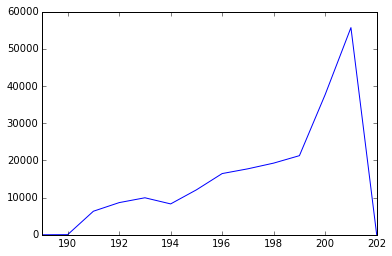

In [41]:
(titles.year // 10).value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

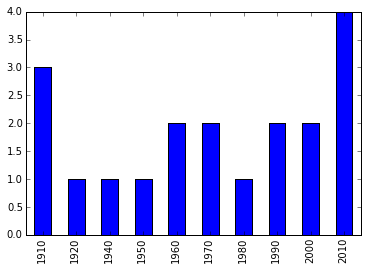

In [75]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

,title,year,name,type,character,n
0,Suuri illusioni,0,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,0,Too $hort,actor,Himself,NaN
2,Menace II Society,0,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,0,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,0,Too $hort,actor,Himself,NaN


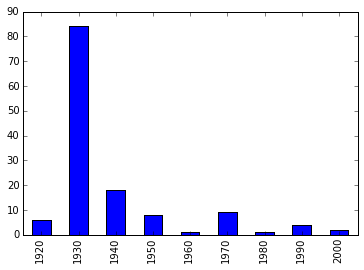

In [68]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Batman" characters each decade.

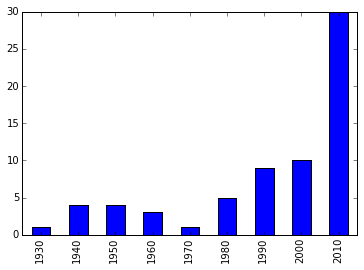

In [76]:
c = cast
c = c[c.character == "Batman"]
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [79]:
c = cast
c.character.value_counts().head(11)

Himself        18828
Dancer         10975
Extra           8693
Reporter        7579
Doctor          6769
Policeman       6449
Student         6361
Nurse           6106
Bartender       6102
Minor Role      5810
Party Guest     5787
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [80]:
c = cast
c = c[c.character == 'Herself']
c.name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Kareena Kapoor          5
Chris Evert             5
Sally Jessy Raphael     5
Lady Gaga               5
Lili?n Garc?a           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [81]:
c = cast
c = c[c.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             92
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Winston Churchill        20
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [83]:
c = cast
c = c[c.year == 1945]
c.name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       28
Harold Miller      28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [84]:
c = cast
c = c[c.year == 1985]
c.name.value_counts().head()

Shakti Kapoor    19
Mammootty        17
Sukumari         16
Lou Scheimer     15
Aruna Irani      14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

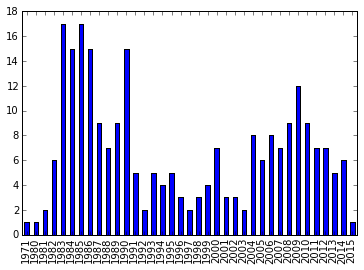

In [88]:
c = cast
c = c[c.name == 'Mammootty']
c.year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [90]:
c = cast
c = c[c.character.str.contains("Patron in")]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Busted Patron in Raid            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [91]:
c = cast
c = c[c.character.str.startswith("Science")]
c.character.value_counts().head(10)

Science Teacher         53
Science Fair Student     8
Science Student          8
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science teacher          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

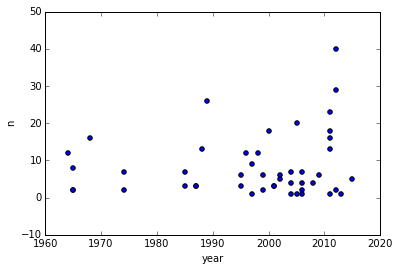

In [94]:
c = cast
c = c[c.name == "Judi Dench"].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

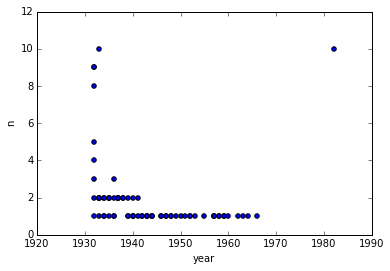

In [95]:
c = cast
c = c[c.name == "Cary Grant"].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

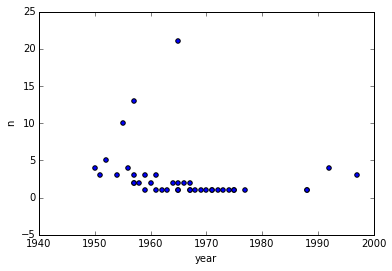

In [96]:
c = cast
c = c[c.name == "Sidney Poitier"].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [97]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6369
actress    2810
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [98]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4394
actor      4373
dtype: int64

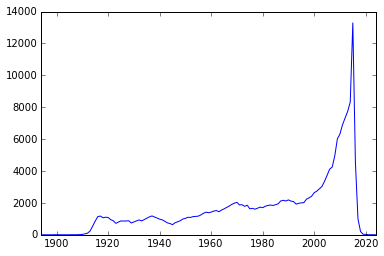

In [25]:
titles.year.value_counts().sort_index().plot()

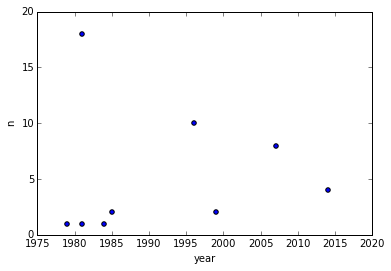

In [29]:
c = cast
c = c[c.character == 'Kermit the Frog']
c.plot(x='year', y='n', kind='scatter')